<a href="https://colab.research.google.com/github/srinathchowdary11/Advanced-Machine-Learning/blob/main/Assignment-4/AML_Assignment_4_Text%26Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

# Text & Sequence Data

In [17]:
!pip install adam

In [86]:

import tensorflow
from tensorflow import keras


In [87]:
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [3]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

In [4]:

# Considering only top 10,000 Words
max_features = 10000

# Setting a Cut-Off Point for Reviews after 150 Words
maxlen = 150

# Loading the Train and Test Datasets of the IMDB Example
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pre-Processing to Convert the Texts to Numericals
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



In [6]:
model1 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model1.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model1.keras",
        save_best_only=True,
        monitor="val_loss")
]
# Model Fit - Running the Model
model_1 = model1.fit(x_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=callbacks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,201 (317.19 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.5884 - loss: 0.6683 - val_acc: 0.7950 - val_loss: 0.4501
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8452 - loss: 0.3760 - val_acc: 0.8526 - val_loss: 0.3446
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8893 - loss: 0.2778 - val_acc: 0.8676 - val_loss: 0.3101
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9073 - loss: 0.2324 - val_acc: 0.8696 - val_loss: 0.3076
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9213 - loss: 0.2049 - val_acc: 0.8762 - val_loss: 0.3017
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9332 - loss: 0.1813 - val_acc: 0.8708 - val_loss: 0.3100
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9444 - loss: 0.1547 - val_acc: 0.8682 - val_loss: 0.3193
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9531 - loss: 0.1386 - val_acc: 0.8658 - val_loss: 0.3267
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - ac

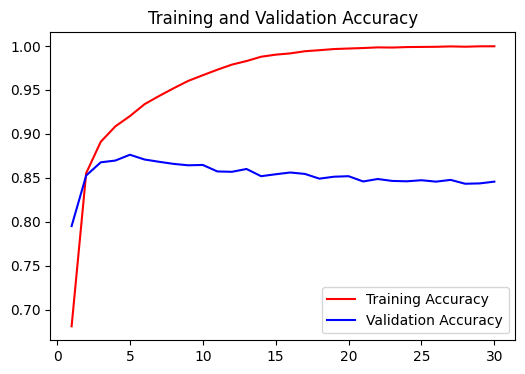

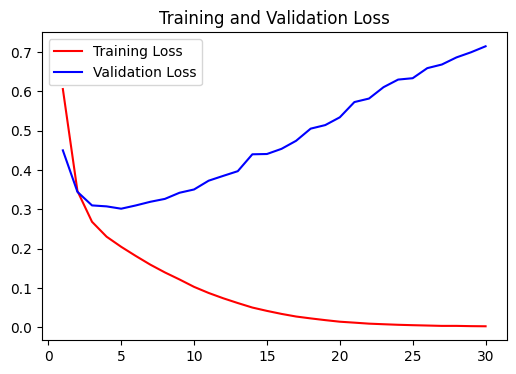

In [7]:
accuracy = model_1.history['acc']
val_accuracy = model_1.history['val_acc']

loss = model_1.history["loss"]
val_loss = model_1.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="red", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [8]:
test_model = load_model('model1.keras')
Model1_Results = test_model.evaluate(x_test,y_test)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8733 - loss: 0.3029
Loss: 0.299
Accuracy: 0.875


#**Model 2: Embedding layers**

**_Training samples- 100, Validation samples- 10000, Test samples- 5000_**



In [106]:


# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [107]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))

# Flattening the Size
model.add(Flatten())

# Adding the Classifer on the top - As the final layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_2 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_25 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │           1,201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,201 (317.19 KB)

 Trainable params: 81,201 (317.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 538ms/step - acc: 0.4672 - loss: 0.6963 - val_acc: 0.5071 - val_loss: 0.6930
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - acc: 0.8949 - loss: 0.6714 - val_acc: 0.5007 - val_loss: 0.6933
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - acc: 0.9653 - loss: 0.6548 - val_acc: 0.5023 - val_loss: 0.6933
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - acc: 0.9939 - loss: 0.6406 - val_acc: 0.5023 - val_loss: 0.6934
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - acc: 1.0000 - loss: 0.6278 - val_acc: 0.5030 - val_loss: 0.6933
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - acc: 1.0000 - loss: 0.6115 - val_acc: 0.5032 - val_loss: 0.6931
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - acc: 1.0000 - loss: 0.5978 - val_acc: 0.5071 - val_loss: 0.6930
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - acc: 1.0000 - loss: 0.5867 - val_acc: 0.5094 - val_loss: 0.6929
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - acc: 1.0000 - loss: 

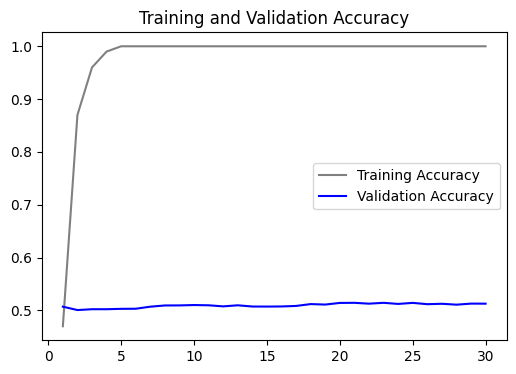

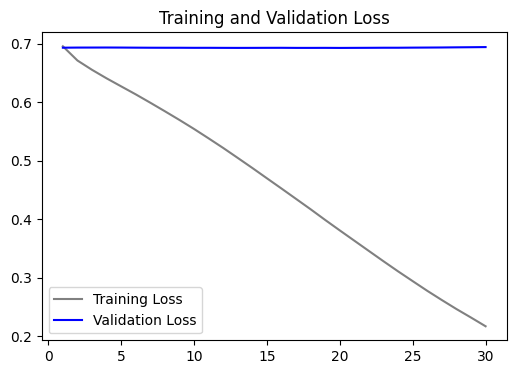

In [108]:
accuracy = Model_2.history['acc']
val_accuracy = Model_2.history['val_acc']

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [109]:
test_model = keras.models.load_model("model2.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.5246 - loss: 0.6933
Test Loss: 0.693
Test accuracy: 0.515


# **Model 3: Embedding+ Conv1D layers+ Dropout**

**_Training Samples- 1000, Validation Samples- 10000, Test Samples- 5000_**

In [80]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=1000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)


In [81]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'adam' , loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 148, 512)            │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_15 (MaxPooling1D)      │ (None, 49, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 47, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_16 (MaxPooling1D)      │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 13, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 13, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_17 (MaxPooling1D)      │ (None, 4, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_5               │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 749,185 (2.86 MB)

 Trainable params: 749,185 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_3 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.5148 - loss: 0.6975 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5216 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4998 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4855 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5052 - loss: 0.6937 - val_accuracy: 0.5172 - val_loss: 0.6927
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5822 - loss: 0.6884 - val_accuracy: 0.5021 - val_loss: 0.6910
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6178 - loss: 0.5934 - val_accuracy: 0.6681 - val_loss: 0.6042
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9300 - loss: 0.1778 - val_accuracy: 0.7046 - 

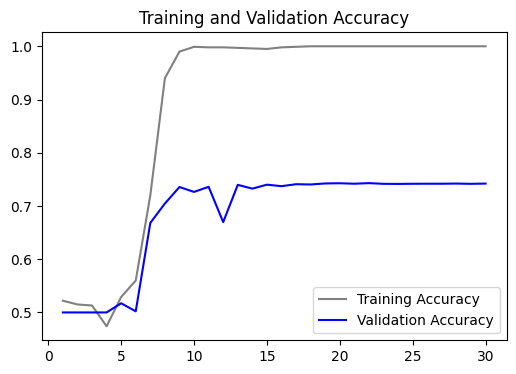

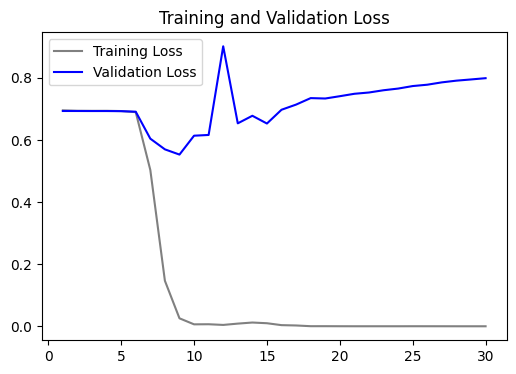

In [83]:
accuracy = Model_3.history['accuracy']
val_accuracy = Model_3.history['val_accuracy']

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


In [88]:
test_model = keras.models.load_model("model3.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7505 - loss: 0.5315
Test Loss: 0.521
Test accuracy: 0.752


# **Model 4- Embedding+ Conv1D+ Dropout**

**_Training samples= 2000 samples, Validation samples- 10000, Test samples- 5000_**

In [99]:
# set the maximum number of words to be used in the vocabulary
num_words = 10000

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# combine the training and testing data to form the full dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# split the data into 100 training samples and 10000 validation samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=2000, test_size=10000, random_state=42, stratify=labels)

# further split the data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# print the sizes of each subset
print("Number of training samples:", len(train_texts))
print("Number of validation samples:", len(val_texts))
print("Number of test samples:", len(texts) - len(train_texts) - len(val_texts))


Number of training samples: 2000
Number of validation samples: 10000
Number of test samples: 38000


In [100]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'adam' , loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model4 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_30 (Conv1D)                   │ (None, 148, 512)            │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_30 (MaxPooling1D)      │ (None, 49, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_31 (Conv1D)                   │ (None, 47, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_31 (MaxPooling1D)      │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_32 (Conv1D)                   │ (None, 13, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 13, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_32 (MaxPooling1D)      │ (None, 4, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_10              │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 749,185 (2.86 MB)

 Trainable params: 749,185 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5211 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5008 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5052 - loss: 0.6932 - val_accuracy: 0.5060 - val_loss: 0.6930
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5077 - loss: 0.6901 - val_accuracy: 0.6834 - val_loss: 0.6137
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7537 - loss: 0.5034 - val_accuracy: 0.7387 - val_loss: 0.5288
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9479 - loss: 0.1533 - val_accuracy: 0.7650 - val_loss: 0.5016
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9867 - loss: 0.0396 - val_accuracy: 0.7632 - val_loss: 0.6252
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9984 - loss: 0.0094 - val_accuracy: 0.7621 - v

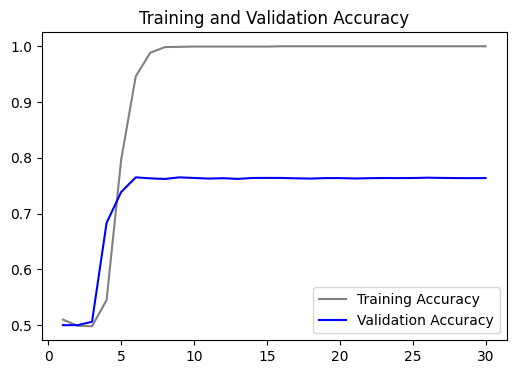

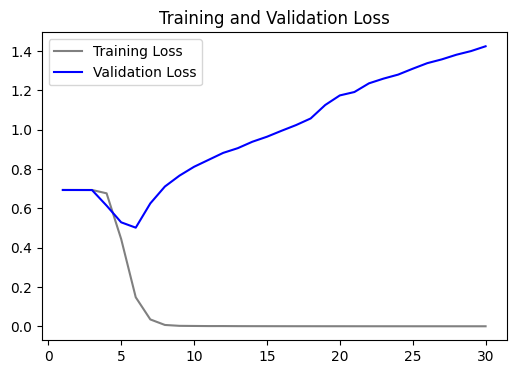

In [101]:

accuracy = model4.history['accuracy']
val_accuracy = model4.history['val_accuracy']

loss = model4.history["loss"]
val_loss = model4.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [102]:
test_model = keras.models.load_model("model4.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7823 - loss: 0.4808
Test Loss: 0.464
Test accuracy: 0.788


# **Model 5- Embedding+ Conv1D+ Dropout**

**_Training sample= 4000, Validation Samples- 10000, Test Samples- 5000_**

In [103]:
# set the maximum number of words to be used in the vocabulary
num_words = 10000

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# combine the training and testing data to form the full dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# split the data into 100 training samples and 10000 validation samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=4000, test_size=10000, random_state=42, stratify=labels)

# further split the data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# print the sizes of each subset
print("Number of training samples:", len(train_texts))
print("Number of validation samples:", len(val_texts))
print("Number of test samples:", len(texts) - len(train_texts) - len(val_texts))


Number of training samples: 4000
Number of validation samples: 10000
Number of test samples: 36000


In [104]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_33 (Conv1D)                   │ (None, 148, 512)            │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_33 (MaxPooling1D)      │ (None, 49, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_34 (Conv1D)                   │ (None, 47, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_34 (MaxPooling1D)      │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_35 (Conv1D)                   │ (None, 13, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 13, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_35 (MaxPooling1D)      │ (None, 4, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_11              │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 749,185 (2.86 MB)

 Trainable params: 749,185 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_5 = model.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5125 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5146 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5927 - loss: 0.6633 - val_accuracy: 0.7464 - val_loss: 0.6102
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7613 - loss: 0.5154 - val_accuracy: 0.7258 - val_loss: 0.5790
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8396 - loss: 0.3693 - val_accuracy: 0.8000 - val_loss: 0.4957
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8739 - loss: 0.3083 - val_accuracy: 0.7770 - val_loss: 0.4863
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9132 - loss: 0.2164 - val_accuracy: 0.7553 - val_loss: 0.4891
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9439 - loss: 0.1560 - val_accurac

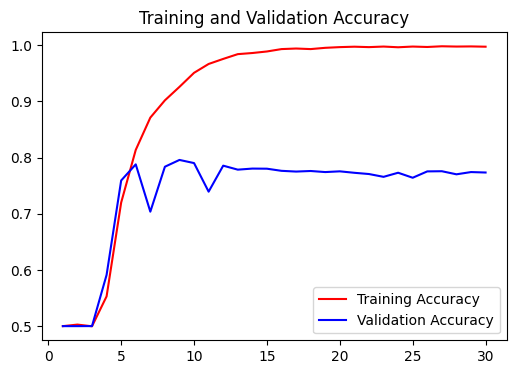

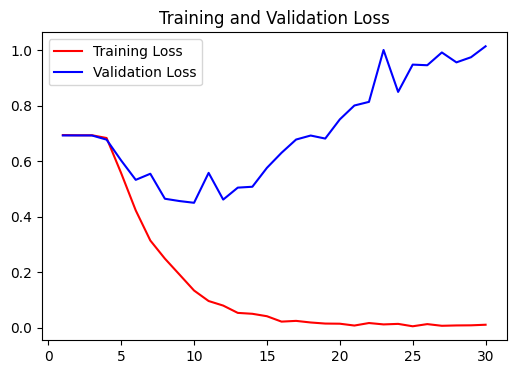

In [29]:
accuracy = model_5.history['accuracy']
val_accuracy = model_5.history['val_accuracy']

loss = model_5.history["loss"]
val_loss = model_5.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="red", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [110]:
test_model = keras.models.load_model("model5.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8154 - loss: 0.4221
Test Loss: 0.414
Test accuracy: 0.815


# **Model 6: Embedding+ Conv1D+ Dropout**

**_Training Sample= 20000, Validation Samples- 10000, Test Samples- 5000_**

In [207]:
from keras.datasets import imdb
from keras import preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# set the maximum number of words to be used in the vocabulary
num_words = 10000

# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# truncate the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# combine the training and testing data to form the full dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# split the data into 100 training samples and 10000 validation samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=20000, test_size=10000, random_state=42, stratify=labels)

# further split the data
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

# print the sizes of each subset
print("Number of training samples:", len(train_texts))
print("Number of validation samples:", len(val_texts))
print("Number of test samples:", len(texts) - len(train_texts) - len(val_texts))


Number of training samples: 20000
Number of validation samples: 10000
Number of test samples: 20000


In [208]:
# Setting the Sequential Layer for Model Building
model = Sequential()

# Adding the Embedding Layer with limiting to consider only the top 10,000 Words
maxlen = 150
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))

model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D(3))

model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.8))
model.add(MaxPooling1D(3))

model.add(GlobalMaxPooling1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compiling the Model
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_39 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 148, 512)            │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_39 (MaxPooling1D)      │ (None, 49, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_40 (Conv1D)                   │ (None, 47, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_40 (MaxPooling1D)      │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_41 (Conv1D)                   │ (None, 13, 256)             │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 13, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_41 (MaxPooling1D)      │ (None, 4, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_13              │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 749,185 (2.86 MB)

 Trainable params: 749,185 (2.86 MB)

 Non-trainable params: 0 (0.00 B)

In [209]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model6.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_6 = model.fit(train_texts, train_labels,
                    epochs=45,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4990 - loss: 0.6935 - val_accuracy: 0.7192 - val_loss: 0.5776
Epoch 2/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7571 - loss: 0.4959 - val_accuracy: 0.7407 - val_loss: 0.5044
Epoch 3/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8821 - loss: 0.2873 - val_accuracy: 0.8277 - val_loss: 0.4487
Epoch 4/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9282 - loss: 0.1918 - val_accuracy: 0.8206 - val_loss: 0.4169
Epoch 5/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9542 - loss: 0.1324 - val_accuracy: 0.8207 - val_loss: 0.4030
Epoch 6/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9730 - loss: 0.0820 - val_accuracy: 0.8048 - val_loss: 0.4296
Epoch 7/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9819 - loss: 0.0534 - val_accuracy: 0.8050 - val_loss: 0.4408
Epoch 8/45
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9877 - loss: 0.0357 - val_accuracy: 0.

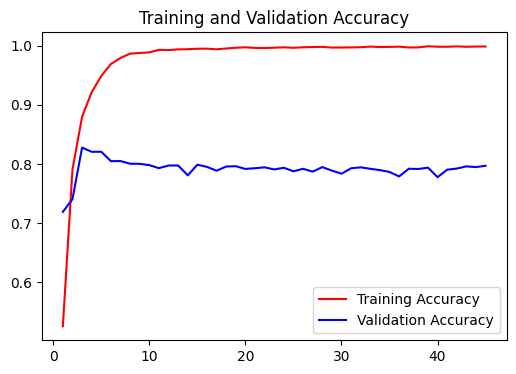

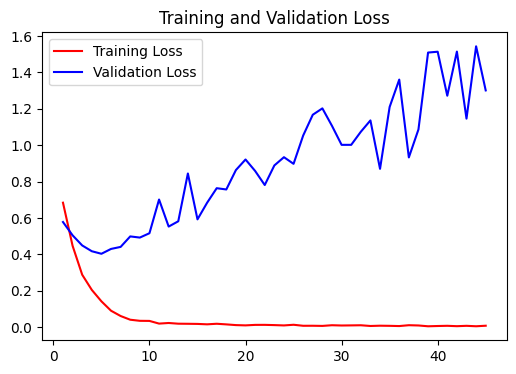

In [210]:
accuracy = model_6.history['accuracy']
val_accuracy = model_6.history['val_accuracy']

loss = model_6.history["loss"]
val_loss = model_6.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="red", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="red", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [211]:
test_model = keras.models.load_model("model6.keras")
test_loss, test_acc = test_model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8825 - loss: 0.3191
Test Loss: 0.323
Test accuracy: 0.881


# **Model 7: Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 100, Validation Samples- 10000, Testing Samples- 5000_**

In [116]:
import os
import shutil
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# ... (rest of your code)

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples = 100  # training on 100 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  13.2M      0  0:00:06  0:00:06 --:--:-- 17.0M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 400000 word vectors.


In [117]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │          38,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,465 (462.75 KB)

 Trainable params: 118,465 (462.75 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
premodel_1 =  model.fit(x_train, y_train,
                     epochs=60,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - accuracy: 0.3758 - loss: 0.6961 - val_accuracy: 0.5063 - val_loss: 0.6929
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.9171 - loss: 0.6723 - val_accuracy: 0.5084 - val_loss: 0.6928
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.9753 - loss: 0.6544 - val_accuracy: 0.5097 - val_loss: 0.6927
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9847 - loss: 0.6391 - val_accuracy: 0.5125 - val_loss: 0.6926
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9785 - loss: 0.6212 - val_accuracy: 0.5102 - val_loss: 0.6925
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.9724 - loss: 0.6034 - val_accuracy: 0.5133 - val_loss: 0.6925
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.9755 - loss: 0.5804 - val_accuracy: 0.5156 - val_loss: 0.6924
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - accuracy: 0.9661 - loss: 0.5502 - val_accuracy: 0.5172 - val_loss:

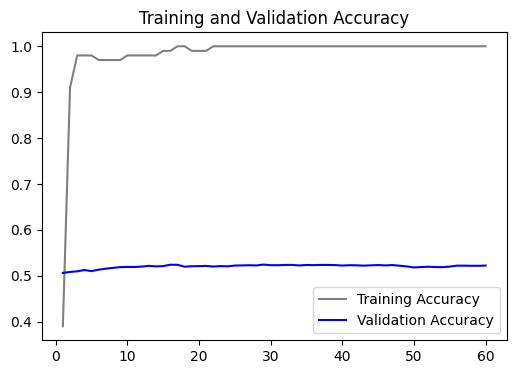

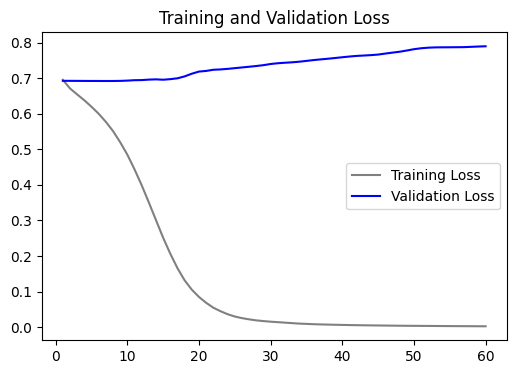

In [119]:

accuracy = premodel_1.history['accuracy']
val_accuracy = premodel_1.history['val_accuracy']

loss = premodel_1.history["loss"]
val_loss = premodel_1.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [120]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]


# **Model 8: Model 7:Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 1000, Validation Samples- 10000, Testing Samples- 5000_**

In [212]:
import os
import shutil
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# ... (rest of your code)

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples = 1000  # training on 1000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  13.0M      0  0:00:06  0:00:06 --:--:-- 16.9M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 400000 word vectors.


In [213]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_40 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 32)                  │          38,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,465 (462.75 KB)

 Trainable params: 118,465 (462.75 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel2.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
premodel_2 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5004 - loss: 0.6942 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8688 - loss: 0.6631 - val_accuracy: 0.5031 - val_loss: 0.6929
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9185 - loss: 0.6038 - val_accuracy: 0.5272 - val_loss: 0.6910
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9780 - loss: 0.4437 - val_accuracy: 0.5516 - val_loss: 0.6937
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9928 - loss: 0.1980 - val_accuracy: 0.5584 - val_loss: 0.7251
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0746 - val_accuracy: 0.5701 - val_loss: 0.7426
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0335 - val_accuracy: 0.5722 - val_loss: 0.7701
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 0.5776 - v

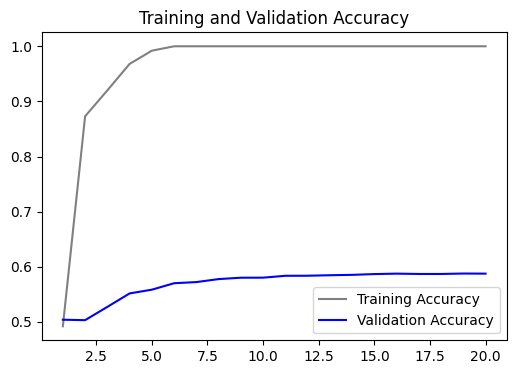

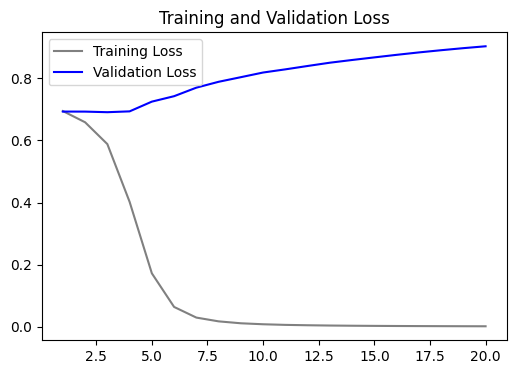

In [215]:
accuracy = premodel_2.history['accuracy']
val_accuracy = premodel_2.history['val_accuracy']

loss = premodel_2.history["loss"]
val_loss = premodel_2.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [216]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

# **Model 9: Model 7: Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 2000, Validation Samples- 10000, Test Samples- 5000_**

In [151]:
import os
import shutil
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# ... (rest of your code)

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples = 2000  # training on 2000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  15.6M      0  0:00:05  0:00:05 --:--:-- 16.9M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 400000 word vectors.


In [152]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │          38,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,465 (462.75 KB)

 Trainable params: 118,465 (462.75 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel3.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
premodel_3 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=18,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5053 - loss: 0.6933 - val_accuracy: 0.5581 - val_loss: 0.6891
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8828 - loss: 0.6244 - val_accuracy: 0.6799 - val_loss: 0.6103
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9540 - loss: 0.2392 - val_accuracy: 0.7348 - val_loss: 0.5344
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9811 - loss: 0.0820 - val_accuracy: 0.7409 - val_loss: 0.5426
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9991 - loss: 0.0162 - val_accuracy: 0.7465 - val_loss: 0.5518
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.7482 - val_loss: 0.5655
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.7507 - val_loss: 0.5746
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accur

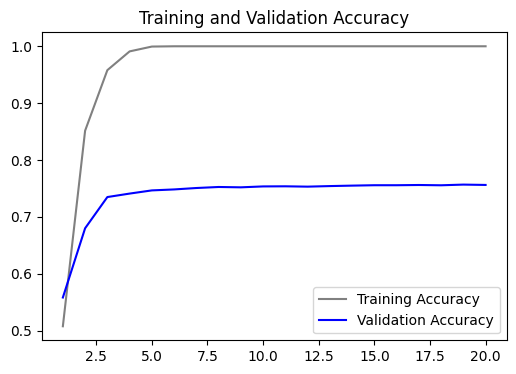

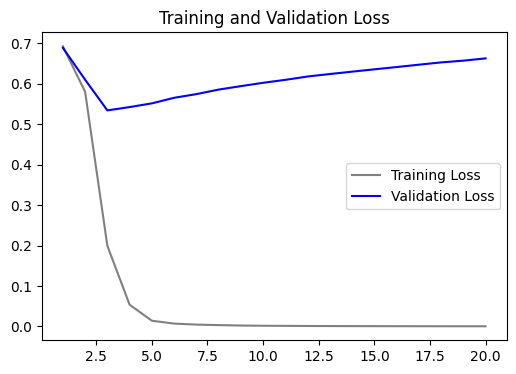

In [158]:
accuracy = premodel_3.history['accuracy']
val_accuracy = premodel_3.history['val_accuracy']

loss = premodel_3.history["loss"]
val_loss = premodel_3.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [159]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

# **Model 10: Model 7: Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 4000, Validation Samples- 10000, Test Samples- 5000_**

In [176]:
import os
import shutil
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# ... (rest of your code)

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples = 4000  # training on 4000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  17.5M      0  0:00:04  0:00:04 --:--:-- 17.5M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 400000 word vectors.


In [195]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_37 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 32)                  │          38,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,465 (462.75 KB)

 Trainable params: 118,465 (462.75 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
premodel_4 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6800 - loss: 0.5485 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9231 - loss: 0.2032 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0959 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0320 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9968 - loss: 0.0135 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

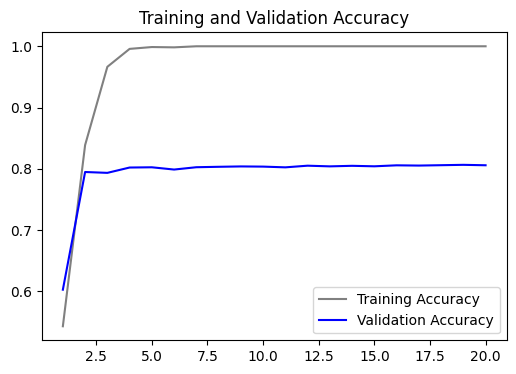

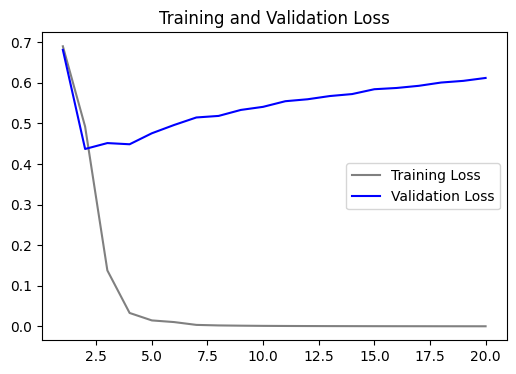

In [179]:
accuracy = premodel_4.history['accuracy']
val_accuracy = premodel_4.history['val_accuracy']

loss = premodel_4.history["loss"]
val_loss = premodel_4.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [193]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

# **Model 11: Model 7: Pre-Trained Embedding Model GloVe, Conv1D, Dropout**

**_Training Samples- 20000, Validation Samples- 10000, Test Samples- 5000_**

In [197]:
import os
import shutil
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

!rm -r aclImdb/train/unsup

imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

maxlen = 150  # cutting off reviews after 150 words
training_samples =20000  # training on 20000 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splitting the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

from google.colab import drive
drive.mount('/content/gdrive')

glove_dir = '/content/gdrive/MyDrive/Glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  15.4M      0  0:00:05  0:00:05 --:--:-- 16.9M
Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 400000 word vectors.


In [198]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=8, input_shape=(maxlen,)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compiling the Model
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_38 (Embedding)             │ (None, 150, 8)              │          80,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 32)                  │          38,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,465 (462.75 KB)

 Trainable params: 118,465 (462.75 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:

# Setting Callbacks
callbacks=callbacks = ModelCheckpoint(
            filepath= "pmodel5.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
premodel_5 =  model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=32,
                     validation_data=(x_val, y_val),
                     callbacks=callbacks)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6205 - loss: 0.6216 - val_accuracy: 0.8686 - val_loss: 0.3138
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8847 - loss: 0.2819 - val_accuracy: 0.8708 - val_loss: 0.3035
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9242 - loss: 0.1972 - val_accuracy: 0.8644 - val_loss: 0.3303
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9577 - loss: 0.1235 - val_accuracy: 0.8612 - val_loss: 0.3703
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9792 - loss: 0.0690 - val_accuracy: 0.8520 - val_loss: 0.4453
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0330 - val_accuracy: 0.8462 - val_loss: 0.5443
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.0165 - val_accuracy: 0.8436 - val_loss: 0.6616
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.

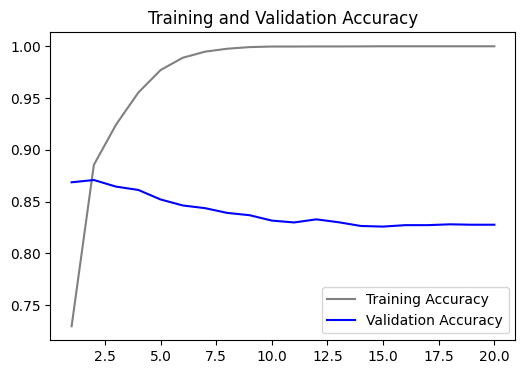

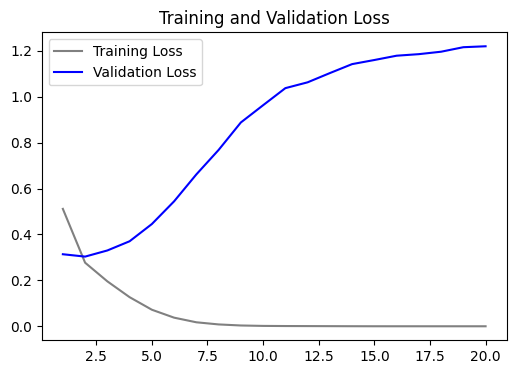

In [203]:

accuracy = premodel_5.history['accuracy']
val_accuracy = premodel_5.history['val_accuracy']

loss = premodel_5.history["loss"]
val_loss = premodel_5.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()


plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [204]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

# **Summary**



In [218]:
import pandas as pd

data = {'Model': ['Model 2',
                      'Model 3','Model 4',
                      'Model 5','Model 6',
                      'Pre Model 1', 'Pre Model 2', 'Pre Model 3', 'Pre Model 4', 'Pre Model 5'],
        'Training Sample':['100','1000','2000','4000','20000','100', '1000', '2000', '4000', '20000'],
        'Validation Sample':['10000','10000','10000','10000','10000','10000','10000', '10000', '10000', '10000'],
        'Test Sample':['5000','5000','5000','5000','5000','5000','5000', '5000', '5000', '5000'],
        'Loss Test': ['0.69%', '0.52%', '0.46%', '0.41%', '0.32%', '0.49%', '0.35%', '0.30%', '0.20%', '0.03%'],
        'Accuracy Test': ['0.51%', '0.75%', '0.78%', '0.81%', '0.88%', '0.69%', '0.86%', '0.88%', '0.92%', '0.99%']
        }

df = pd.DataFrame(data, columns = ['Model', 'Training Sample','Validation Sample','Test Sample', 'Loss Test', 'Accuracy Test'])

df

,Model,Training Sample,Validation Sample,Test Sample,Loss Test,Accuracy Test
0,Model 2,100,10000,5000,0.69%,0.51%
1,Model 3,1000,10000,5000,0.52%,0.75%
2,Model 4,2000,10000,5000,0.46%,0.78%
3,Model 5,4000,10000,5000,0.41%,0.81%
4,Model 6,20000,10000,5000,0.32%,0.88%
5,Pre Model 1,100,10000,5000,0.49%,0.69%
6,Pre Model 2,1000,10000,5000,0.35%,0.86%
7,Pre Model 3,2000,10000,5000,0.30%,0.88%
8,Pre Model 4,4000,10000,5000,0.20%,0.92%
9,Pre Model 5,20000,10000,5000,0.03%,0.99%


from matplotlib import pyplot as plt
_df_34['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('Training Sample').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Training Sample')):
  _plot_series(series, series_name, i)
  fig.legend(title='Training Sample', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_37['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['Training Sample'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='index', y='Training Sample', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)